<a href="https://colab.research.google.com/github/Leggomezme/ExData_Plotting/blob/master/PracticaRenPython_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt



In [ ]:
from platform import python_version
print(python_version())
import pandas as pd
import rpy2
print(rpy2.__version__)

3.7.10
3.4.2


In [ ]:
import rpy2.situation
for row in rpy2.situation.iter_info():
    print(row)

rpy2 version:
3.4.2
Python version:
3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Looking for R's HOME:
    Environment variable R_HOME: None
    Calling `R RHOME`: /usr/lib/R
    Environment variable R_LIBS_USER: None
R's additions to LD_LIBRARY_PATH:
/usr/local/nvidia/lib:/usr/local/nvidia/lib64
R version:
    In the PATH: R version 4.0.4 (2021-02-15) -- "Lost Library Book"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/usr/share/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'icuuc', 'icui18n']
  library_dirs:
  ['/usr/lib/R/lib']
  extra_compile_args:
  []
  extra_link_args:
  ['-Wl,--export-dynamic', '-fopenmp', '-Wl,-Bsymbolic-functions', '-Wl,-z,relro']


In [ ]:
import os, sys
from google.colab import drive
#drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

FileExistsError: ignored

Permite Instalar y no tener que volver a hacerlo

In [ ]:
#!pip install  fred
#!pip install --target=$nb_path fredapi
!pip install --target=$nb_path pandas

  Using cached https://files.pythonhosted.org/packages/f3/d4/3fe3b5bf9886912b64ef040040aec356fa48825e5a829a84c2667afdf952/pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/8a/064b4077e3d793f877e3b77aa64f56fa49a4d37236a53f78ee28be009a16/numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0"

In [ ]:
from fred import Fred ###Debe instalarse primero usando pip install fredapi

from fredapi import Fred
fred = Fred(api_key='c82b24bfe94f87ca893d96715d083b91')
data = fred.get_series('SP500')
data_unmprateUS = fred.get_series('UNRATE')

data
data_unmprateUS
type(data_unmprateUS)  #Note que entra la serie de una vez

2011-03-24    1309.66
2011-03-25    1313.80
2011-03-28    1310.19
2011-03-29    1319.44
2011-03-30    1328.26
               ...   
2021-03-17    3974.12
2021-03-18    3915.46
2021-03-19    3913.10
2021-03-22    3940.59
2021-03-23    3910.52
Length: 2609, dtype: float64

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2020-10-01    6.9
2020-11-01    6.7
2020-12-01    6.7
2021-01-01    6.3
2021-02-01    6.2
Length: 878, dtype: float64

pandas.core.series.Series

In [ ]:
## Trabajo Intearactivo con R


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
#data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index

#convert to time series:
ts = pasajeros['NPassengers']
ts.head(10)

####Graficar la Serie#####
plt.plot(ts)
plt.title('AirPassengers')
plt.show()

FileNotFoundError: ignored

In [ ]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython
%load_ext rpy2.ipython
InPythontoR=data['NPassengers']

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


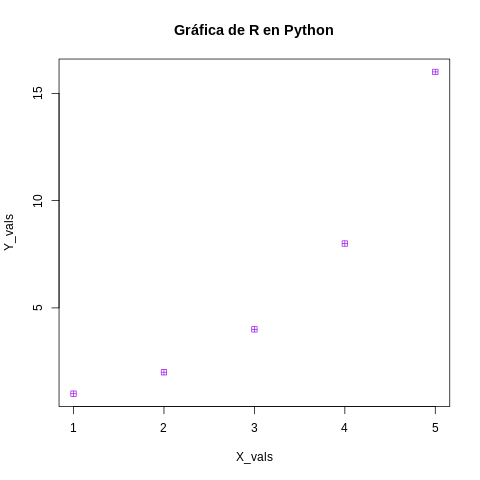

In [ ]:
%%R
X_vals=c(1,2,3,4,5)
Y_vals=c(1,2,4,8,16)
plot(X_vals,Y_vals,col='purple',pch=12,main='Gráfica de R en Python')

Si el paquete FitAR no está instalado y tampoco forecast, entonces se procede a correr las dos siguientes líneas

In [ ]:
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f02ce3d8550> [RTYPES.NILSXP]

In [ ]:
packnames = ('FitAR',  'forecast')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘xts’, ‘TTR’, ‘glmnet’, ‘grpreg’, ‘pls’, ‘quadprog’, ‘quantmod’, ‘leaps’, ‘ltsa’, ‘bestglm’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fa07089c050> [RTYPES.NILSXP]

In [ ]:
%%R --i InPythontoR --o lInPythontoR
print(InPythontoR)
library(FitAR)
FitAR::BoxCox(InPythontoR)
lInPythontoR=forecast::BoxCox(InPythontoR,lambda=0)

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149 170 170 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166 171 180 193 181 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
183 218 230 242 209 191 172 194 196 196 236 235 229 243 264 272 237 211 180 201 
 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 
204 188 235 227 234 264 302 293 259 229 203 229 242 233 267 269 270 315 364 347 
 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 
312 274 237 278 284 277 317 313 318 374 413 405 355 306 271 306 315 301 356 348 
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 
355 422 465 467 404 347 305 336 340 318 362 348 363 435 491 505 404 359 310 337 
120 121 122 123 124 125 126 

R[write to console]: Error in library(FitAR) : there is no package called ‘FitAR’




Error in library(FitAR) : there is no package called ‘FitAR’


In [ ]:
%R -o lInPythontoR

In [ ]:
lInPythontoR

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

## Otra forma de trabajar usando código de Python únicamente

podemos seguir la página https://rpy2.github.io/doc/latest/html/index.html

In [ ]:
from rpy2.ipython.ggplot import image_png
rprint = robjects.globalenv.find("print")
from rpy2.robjects.packages import importr
ts=robjects.r('ts')
forecast=importr('forecast')
baser=importr('base')
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [ ]:
data_natural_gas = fred.get_series('NATURALGAS') ##Consumo de Gas Natural mensual Billion Cubic Feet 
data_natural_gas
data_natural_gas

2000-01-01    2510.5
2000-02-01    2330.7
2000-03-01    2050.6
2000-04-01    1783.3
2000-05-01    1632.9
               ...  
2020-09-01    2174.3
2020-10-01    2323.0
2020-11-01    2440.7
2020-12-01    3155.7
2021-01-01    3309.4
Length: 253, dtype: float64

2000-01-01    2510.5
2000-02-01    2330.7
2000-03-01    2050.6
2000-04-01    1783.3
2000-05-01    1632.9
               ...  
2020-09-01    2174.3
2020-10-01    2323.0
2020-11-01    2440.7
2020-12-01    3155.7
2021-01-01    3309.4
Length: 253, dtype: float64

In [ ]:
rdata=ts(data_natural_gas.values,frequency=12)
rdata
lambdar=forecast.BoxCox_lambda(rdata, method = "guerrero", lower = -1, upper = 3)
print(lambdar)
BoxCox_rdata=forecast.BoxCox(rdata,**{'lambda':0})
print(BoxCox_rdata)

array([2510.5, 2330.7, 2050.6, 1783.3, 1632.9, 1513.1, 1525.6, 1653.1,
       1475. , 1567.8, 1908.5, 2587.5, 2677. , 2309.5, 2246.6, 1807.2,
       1522.4, 1444.4, 1598.1, 1669.2, 1494.1, 1649.1, 1701. , 2120.2,
       2487.6, 2242.4, 2258.4, 1881. , 1611.5, 1591.4, 1748.4, 1725.7,
       1542.2, 1645.9, 1913.6, 2378.9, 2700.5, 2500.3, 2197.9, 1743.5,
       1514.7, 1368.4, 1600.5, 1651.6, 1428.6, 1553.2, 1753.6, 2263.7,
       2675.8, 2511.1, 2100.9, 1745.2, 1573. , 1483.7, 1584.9, 1578. ,
       1482.2, 1557.2, 1782.8, 2327.7, 2561.9, 2243. , 2205.8, 1724.9,
       1522.6, 1534.1, 1686.6, 1695.1, 1422.5, 1428.2, 1663.4, 2326.4,
       2165.3, 2144.4, 2126.4, 1681. , 1526.3, 1550.9, 1758.7, 1751.7,
       1462.1, 1644.2, 1765.4, 2122.8, 2475.6, 2567. , 2128.8, 1810.1,
       1559.1, 1555.2, 1659.9, 1896.1, 1590.5, 1627.8, 1834.5, 2399.2,
       2734. , 2503.4, 2278.2, 1823.9, 1576.4, 1604.2, 1708.6, 1682.9,
       1460.9, 1635.8, 1868.9, 2399.7, 2729.7, 2332.5, 2170.7, 1741.3,
      

[0.06842681]
[7.82823722 7.75392393 7.62588771 7.48622086 7.39811285 7.32191581
 7.33014305 7.41040759 7.29641327 7.35742864 7.55407287 7.85844744
 7.89245204 7.74478633 7.71717324 7.49953397 7.32804332 7.27544929
 7.3765707  7.42009975 7.3092793  7.40798496 7.43897159 7.6592657
 7.81907367 7.715302   7.72241188 7.53955883 7.3849207  7.37236941
 7.46645636 7.45338804 7.34096525 7.40604263 7.55674156 7.77439347
 7.90119222 7.824166   7.69525764 7.46364987 7.32297268 7.22139745
 7.37807136 7.40949979 7.26445022 7.3480726  7.4694261  7.72475592
 7.89200368 7.82847618 7.6501211  7.46462444 7.3607399  7.30229425
 7.36827659 7.3639135  7.30128275 7.35064462 7.48594044 7.75263593
 7.84850445 7.71556953 7.69884553 7.45292436 7.32817468 7.33569917
 7.43046995 7.43549702 7.26017117 7.26417019 7.41661898 7.75207729
 7.6803142  7.67061507 7.66218569 7.42714413 7.33060178 7.34659069
 7.47233018 7.46834202 7.28762904 7.40500922 7.47613257 7.66049125
 7.81423807 7.85049318 7.66331372 7.50113737 7.351

In [ ]:
grdevices = importr('grDevices')

grdevices.png(file="file.png", width=512, height=512)
# plotting code here
rplot=baser.plot(rdata,**{'type':'l'},ylab='')
grdevices.dev_off()

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fa07089c050> [RTYPES.NILSXP]

array([1], dtype=int32)

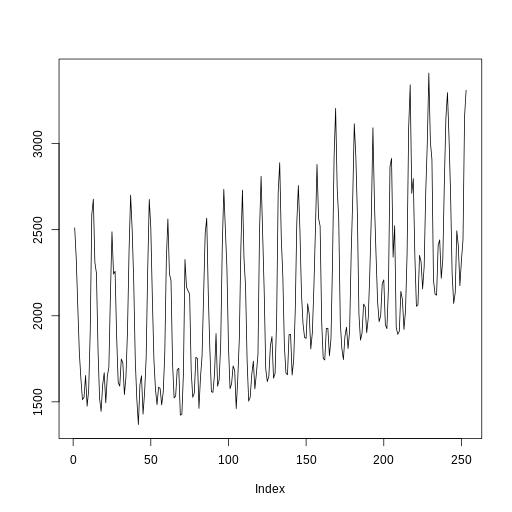

In [ ]:
from IPython.display import Image
Image(filename='file.png')

In [ ]:
%%R
lib_loc <- "/content/mydrive/r-lib"
install.packages("data.table", lib = lib_loc)

R[write to console]: Warning in install.packages("data.table", lib = lib_loc) :
R[write to console]: 
 
R[write to console]:  'lib = "/content/mydrive/r-lib"' is not writable



Would you like to use a personal library instead? (yes/No/cancel) y
Would you like to create a personal library
‘~/R/x86_64-pc-linux-gnu-library/4.0’
to install packages into? (yes/No/cancel) y


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/data.table_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5303849 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to